In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
# import src.utils as utils
from tqdm import tqdm

# Open data 

In [2]:
det_w1 = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/for_pia/20230823_tracking_gt_2D5_25pM_30mW_2s_denoised/detections__20230823_tracking_gt_2D5_25pM_30mW_2s_denoised__w1.csv')
det_w2 = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/for_pia/20230823_tracking_gt_2D5_25pM_30mW_2s_denoised/detections__20230823_tracking_gt_2D5_25pM_30mW_2s_denoised__w2.csv')

## Bleaching curve

In [3]:
le_1 = []
le_2 = []
for i in det_w1.frame.unique():
    # print(i)
    # print(len(det_w1[det_w1.frame == i]))
    le_1.append(len(det_w1[det_w1.frame == i]))
    le_2.append(len(det_w2[det_w2.frame == i]))

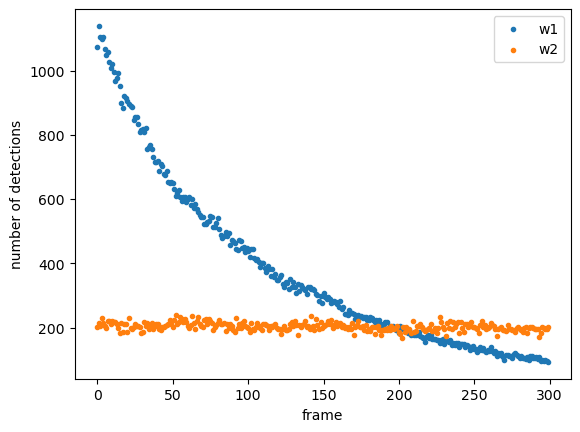

In [4]:
plt.scatter(det_w1.frame.unique(),le_1,marker='.',label='w1')
plt.scatter(det_w2.frame.unique(),le_2,marker='.',label='w2')
plt.legend()
plt.xlabel('frame')
plt.ylabel('number of detections')
plt.show()

In [5]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

In [6]:
import scipy.optimize as opt

In [7]:
xs,ys = det_w1.frame.unique(),le_1

R² = 0.996273760212798
Y = 1026.5946929402712 * e^(-0.01054883319488895 * x) + 66.03614963803288
Tau = 4739.86071030355 µs


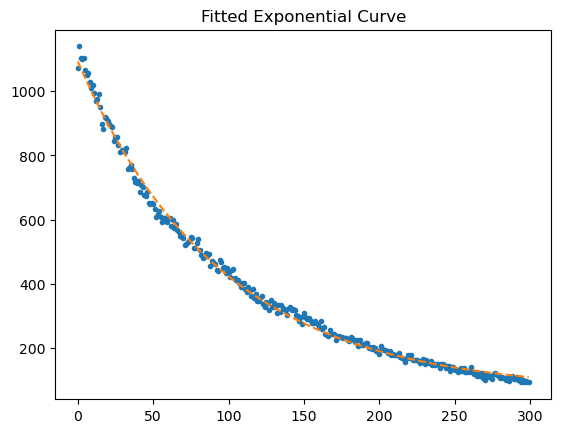

In [8]:
# perform the fit
p0 = (2000, .1, 50) # start with values near those we expect
params, cv = opt.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")

In [21]:
first = ys[0:150]
second = ys[150:300]

mult = [second[i] * 5 for i in range(len(second))]

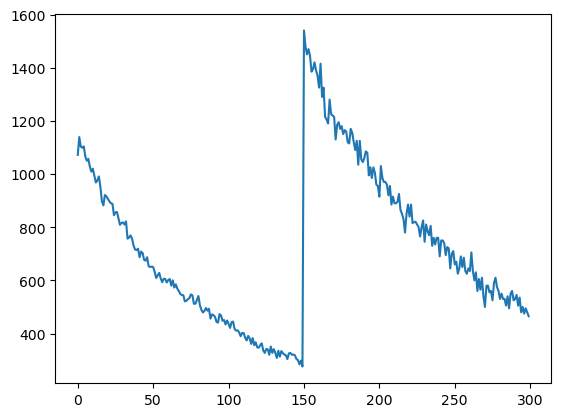

In [22]:
plt.plot(xs,first+mult)

In [23]:
a = autocorr5(np.array(first+mult),xs)

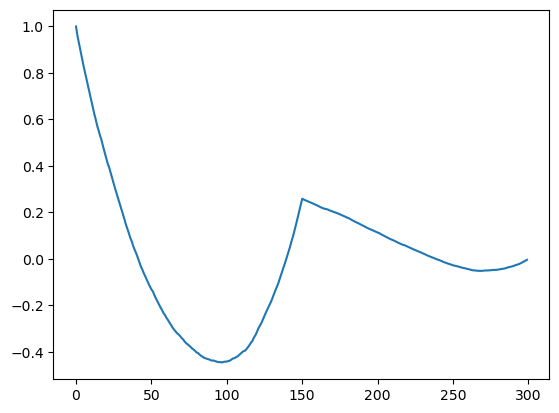

In [24]:
plt.plot(a)

In [5]:
N = len(le_1)
x = np.sort(le_1) 
  
# get the cdf values of y 
y = np.arange(N) / float(N) 
  

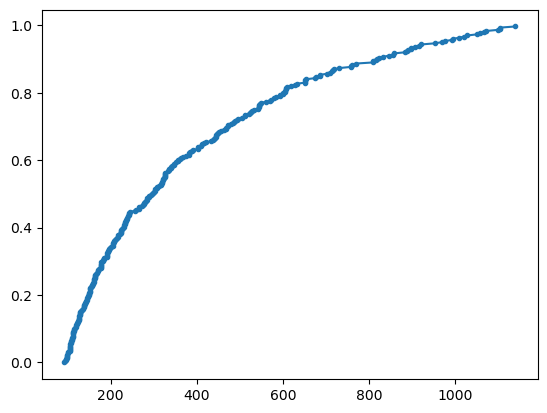

In [11]:
plt.plot(x, y, label='w1',marker='.')

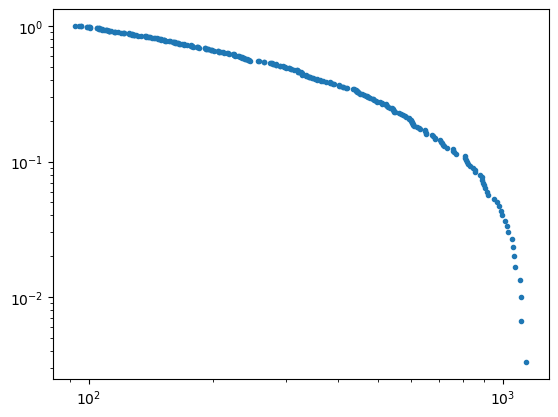

In [7]:
plt.scatter(x, 1-y, label='w1',marker='.')
plt.xscale('log')
plt.yscale('log')

In [71]:
count, bins_count = np.histogram(le_1, bins=200) 
  
# finding the PDF of the histogram using count values 
pdf = count / sum(count) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf = np.cumsum(pdf)

In [60]:
le_1

[1072,
 1139,
 1103,
 1099,
 1104,
 1066,
 1050,
 1057,
 1028,
 1009,
 1020,
 994,
 968,
 976,
 991,
 952,
 898,
 882,
 921,
 916,
 906,
 897,
 890,
 888,
 845,
 856,
 857,
 833,
 809,
 816,
 818,
 810,
 822,
 757,
 761,
 769,
 757,
 731,
 716,
 714,
 719,
 687,
 708,
 703,
 677,
 674,
 687,
 653,
 650,
 652,
 650,
 632,
 609,
 619,
 628,
 607,
 593,
 606,
 605,
 592,
 601,
 605,
 580,
 600,
 573,
 585,
 569,
 560,
 549,
 545,
 544,
 521,
 523,
 529,
 533,
 547,
 544,
 512,
 512,
 526,
 541,
 506,
 489,
 479,
 485,
 496,
 486,
 493,
 456,
 472,
 469,
 463,
 444,
 441,
 473,
 468,
 448,
 451,
 434,
 449,
 437,
 421,
 443,
 445,
 417,
 411,
 412,
 404,
 390,
 402,
 402,
 384,
 374,
 391,
 382,
 361,
 383,
 356,
 367,
 348,
 347,
 356,
 363,
 336,
 327,
 342,
 340,
 320,
 351,
 327,
 341,
 327,
 308,
 335,
 313,
 334,
 326,
 321,
 318,
 304,
 325,
 327,
 320,
 321,
 318,
 304,
 300,
 284,
 298,
 276,
 308,
 296,
 290,
 294,
 289,
 277,
 279,
 284,
 278,
 274,
 265,
 283,
 258,
 265,
 243,

(array([4., 2., 4., 6., 6., 6., 3., 2., 3., 6., 4., 2., 3., 3., 3., 3., 6.,
        2., 2., 5., 5., 1., 3., 0., 6., 2., 2., 0., 6., 2., 2., 0., 4., 2.,
        1., 3., 0., 5., 1., 3., 3., 4., 1., 4., 0., 0., 1., 1., 0., 2., 0.,
        1., 2., 2., 3., 0., 2., 1., 2., 1., 2., 2., 0., 1., 2., 4., 2., 4.,
        0., 3., 1., 2., 1., 2., 0., 2., 1., 1., 1., 0., 1., 0., 1., 2., 0.,
        2., 0., 0., 2., 1., 0., 2., 1., 0., 1., 0., 0., 1., 1., 1., 3., 1.,
        2., 0., 1., 0., 1., 2., 2., 0., 1., 0., 2., 1., 1., 1., 0., 0., 1.,
        0., 2., 0., 1., 1., 1., 1., 1., 0., 1., 3., 2., 0., 0., 1., 0., 0.,
        1., 1., 0., 1., 0., 1., 0., 2., 0., 2., 2., 3., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        2., 0., 0., 0., 1., 0., 1., 0., 2., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 2., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2., 0., 2., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 

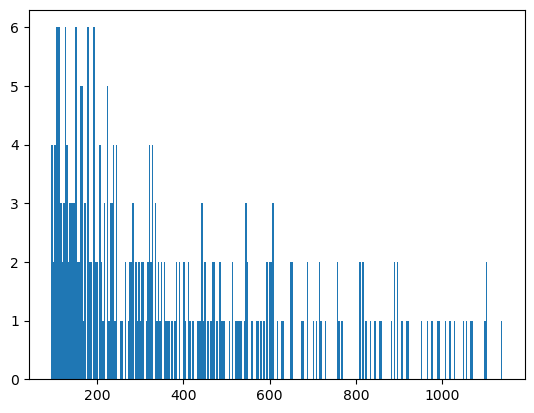

In [59]:
plt.hist(le_1,bins=len(le_1))

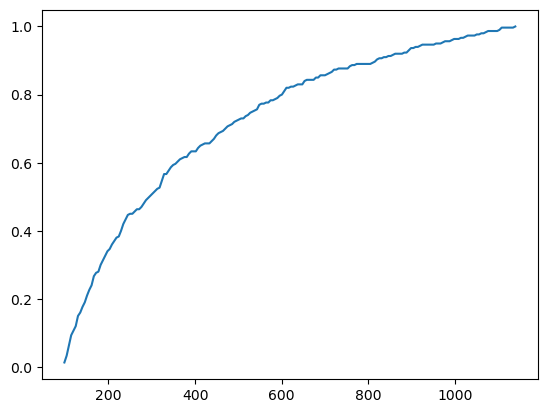

In [72]:
plt.plot(bins_count[1:], cdf, label="CDF") 

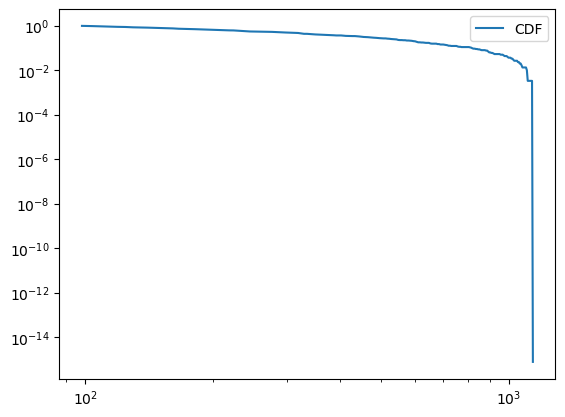

In [73]:
plt.plot(bins_count[1:], 1-cdf, label="CDF") 
plt.yscale('log')
plt.xscale('log')
plt.legend()

# Estimating survival probability

In [13]:
df_cor =pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/for_pia/20230823_tracking_gt_2D5_25pM_30mW_2s_denoised/msd_corrected__20230823_tracking_gt_2D5_25pM_30mW_2s_denoised.csv')

df_cor_nip = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230526_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230526_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')
df_cor_nip_t = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')
df_cor_sor_t = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230602_Rad21-Halo_sororin_2D5_3h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230602_Rad21-Halo_sororin_2D5_3h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')
df_cor_sor = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')

df_cor_bleach = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/fixed/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_uncorrected__20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')

In [5]:
df_cor.tamsd = df_cor.tamsd*(0.16) # from pixel to µm
df_cor.lags = df_cor.lags*2 # from frame to seconds
df_cor.tamsd = df_cor.tamsd - (2*(0.035**2)) # subtract the localization error
df_cor.rename(columns={'tamsd':'MSD(µm^2)','lags':'lags(s)'}, inplace=True)

In [63]:
max_d = []
max_s = []
for i in df_cor.track_id.unique():
    max_d.append(df_cor[df_cor.track_id == i]['MSD(µm^2)'].max())
    max_s.append(df_cor[df_cor.track_id == i]['lags(s)'].max())

In [64]:
max_d

[0.15163220849183479,
 0.26222447151480854,
 2.881981380719867,
 0.6730626116123742,
 4.278456175864298,
 0.46300081657115816,
 0.3858249785649591,
 0.059446512922509714,
 0.42807138409386686,
 0.48109973815036167,
 2.097904117116931,
 0.571539995639611,
 0.37796474043294165,
 0.4807071348672269,
 1.1808761193816446,
 0.19577337172745204,
 1.5285262184028527,
 1.114666801193543,
 1.4895034952416497,
 0.5081507751955326,
 1.5230332972322143,
 2.3556311824659715,
 0.4876172878723499,
 1.2298642114764406,
 0.22964832820602377,
 0.9554083959007625,
 3.2693614409381695,
 2.2920390146754652,
 3.4507602943277935,
 1.58375027782845,
 0.26799675991406424,
 0.4081636877076038,
 1.1710672255459482,
 0.32143746447572524,
 0.6518163740219783,
 1.0547625437724684,
 1.8664989053733094,
 1.847444476277271,
 1.071494107248555,
 0.3134796689173527,
 0.2677590040450731,
 0.17360650574084713,
 0.31240178558230913,
 1.153727318214192,
 0.3454257146289053,
 11.205694052284848,
 0.4590433800965184,
 0.365204

In [67]:
max_s

[2.0,
 12.0,
 62.0,
 14.0,
 18.0,
 6.0,
 14.0,
 2.0,
 18.0,
 32.0,
 4.0,
 22.0,
 6.0,
 6.0,
 8.0,
 6.0,
 16.0,
 4.0,
 4.0,
 6.0,
 42.0,
 16.0,
 18.0,
 38.0,
 4.0,
 14.0,
 112.0,
 34.0,
 92.0,
 4.0,
 2.0,
 4.0,
 12.0,
 8.0,
 6.0,
 56.0,
 4.0,
 36.0,
 30.0,
 14.0,
 4.0,
 8.0,
 14.0,
 8.0,
 6.0,
 126.0,
 14.0,
 8.0,
 12.0,
 2.0,
 6.0,
 12.0,
 6.0,
 86.0,
 14.0,
 46.0,
 8.0,
 24.0,
 68.0,
 14.0,
 66.0,
 4.0,
 10.0,
 14.0,
 4.0,
 10.0,
 52.0,
 28.0,
 56.0,
 20.0,
 2.0,
 2.0,
 2.0,
 118.0,
 6.0,
 30.0,
 14.0,
 4.0,
 6.0,
 22.0,
 148.0,
 4.0,
 38.0,
 18.0,
 22.0,
 128.0,
 8.0,
 6.0,
 12.0,
 32.0,
 2.0,
 30.0,
 36.0,
 44.0,
 2.0,
 20.0,
 144.0,
 8.0,
 2.0,
 48.0,
 2.0,
 2.0,
 40.0,
 102.0,
 22.0,
 4.0,
 192.0,
 2.0,
 2.0,
 20.0,
 58.0,
 12.0,
 6.0,
 110.0,
 26.0,
 62.0,
 32.0,
 2.0,
 48.0,
 134.0,
 80.0,
 14.0,
 20.0,
 16.0,
 34.0,
 24.0,
 6.0,
 86.0,
 10.0,
 22.0,
 30.0,
 6.0,
 12.0,
 10.0,
 2.0,
 24.0,
 44.0,
 6.0,
 72.0,
 6.0,
 20.0,
 24.0,
 44.0,
 64.0,
 12.0,
 42.0,
 2.0,
 2.0,
 28.0,
 46

In [68]:
(count, bins_count) = np.histogram(max_s, bins=100)

cdf = (np.cumsum(count / sum(count)))

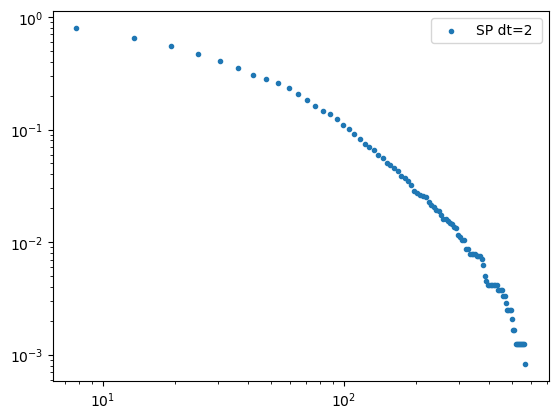

In [69]:
#plt.plot(bins_count[1:], cdf, label="CDF") 
plt.scatter(bins_count[1:], 1-cdf, label="SP dt=2 ",marker='.') 

plt.yscale('log')
plt.xscale('log')
plt.legend()

In [6]:
def compute_cdf(path,dt = 10):
    df = pd.read_csv(path)
    df.tamsd = df.tamsd*(0.16) # from pixel to µm
    df.lags = df.lags*dt # from frame to seconds
    df.tamsd = df.tamsd - (2*(0.035**2)) # subtract the localization error
    df.rename(columns={'tamsd':'MSD(µm^2)','lags':'lags(s)'}, inplace=True)

    max_s = []
    for i in df.track_id.unique():
        max_s.append(df[df.track_id == i]['lags(s)'].max())
    
    counts,bins = np.histogram(max_s,bins=181)
    cdf = np.cumsum(counts / sum(counts))
    return bins[1:],1-cdf

In [55]:
def compute_cdf_bleaching(path,dt = 10):
    df = pd.read_csv(path)
    df.frame = df.frame*dt # from frame to seconds
    le_1 = []
    for i in df.frame.unique():
        le_1.append(len(df[df.frame == i]))

    
    counts,bins = np.histogram(le_1,bins=181)
    cdf = np.cumsum(counts / sum(counts))
    return bins[1:],1-cdf

In [7]:
list_path = [
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230526_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230526_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv',
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv',
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230602_Rad21-Halo_sororin_2D5_3h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230602_Rad21-Halo_sororin_2D5_3h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv',
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv',
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/fixed/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv']

In [57]:
list_path_b = [
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230526_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/detections__20230526_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB__w1.csv',
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/detections__20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB__w1.csv',
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230602_Rad21-Halo_sororin_2D5_3h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB/detections__20230602_Rad21-Halo_sororin_2D5_3h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB__w1.csv',
'/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/detections__20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB__w1.csv']

In [8]:
bins, cdf = zip(*map(compute_cdf,list_path))

In [59]:
bins_b, cdf_b = zip(*map(compute_cdf_bleaching,list_path_b))

In [60]:
max(np.asarray(bins).flatten())

1580.0

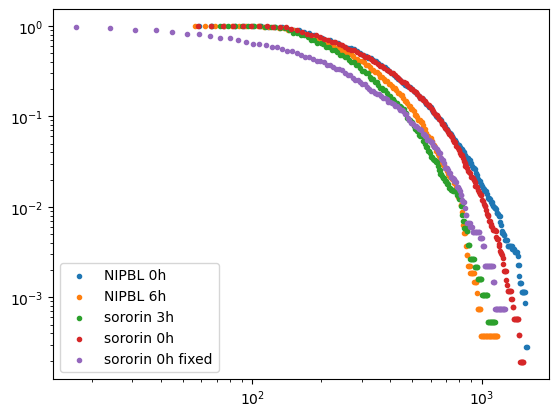

In [10]:
for b,c,lab in zip(bins,cdf,['NIPBL 0h','NIPBL 6h','sororin 3h','sororin 0h','sororin 0h fixed']):
    plt.scatter(b[:-1],c[:-1],marker='.',label=lab)
    plt.yscale('log')
    plt.xscale('log')

plt.legend()

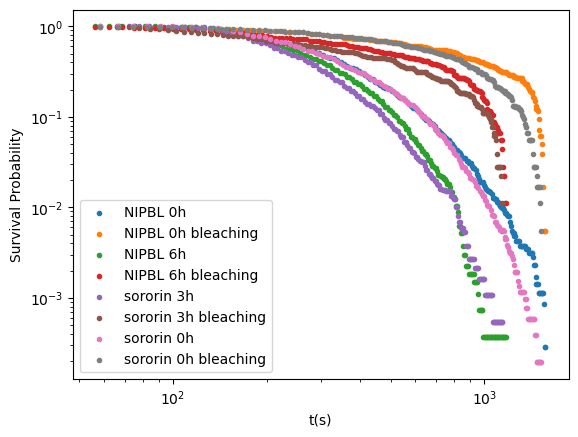

In [61]:
for b,c,lab,b_b,c_b in zip(bins,cdf,['NIPBL 0h','NIPBL 6h','sororin 3h','sororin 0h'],bins_b,cdf_b):
    plt.scatter(b,c,marker='.',label=lab)
    plt.scatter(b[:-1],c_b[:-1],marker='.',label=lab+' bleaching')
    plt.yscale('log')
    plt.xscale('log')

plt.xlabel('t(s)')
plt.ylabel('Survival Probability')
plt.legend()

# Try and estimate the bound fraction as a function of the cutoff distance on tracks

In [2]:
tracks = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/tracks_merged__20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')

In [106]:
tracks.x = tracks.x*0.16
tracks.y = tracks.y*0.16

In [107]:
test_tracks  = tracks[tracks.track_id == 245].copy()
test_tracks.x = test_tracks.x*0.16
test_tracks.y = test_tracks.y*0.16
test_tracks

,Unnamed: 0,x,y,frame,track_id,label,channel,z
179,245,7.603177,2.821296,0,245,17,w1,0
7861,10026,7.609905,2.807762,2,245,17,w1,0
10229,13031,7.618132,2.764506,3,245,17,w1,0
13562,17154,7.628770,2.759822,4,245,17,w1,0
15554,19609,7.634364,2.738137,5,245,17,w1,0
...,...,...,...,...,...,...,...,...
361556,13716,2.318913,3.676901,88,245,13,w2,0
361654,13841,2.344639,3.671559,89,245,13,w2,0
361874,14126,2.348366,3.681056,91,245,13,w2,0
362032,14322,2.351418,3.694744,92,245,13,w2,0


In [108]:
test_tracks['dist'] = np.sqrt((test_tracks.x - test_tracks.x.shift(1))**2 + (test_tracks.y - test_tracks.y.shift(1))**2)

In [109]:
test_tracks

,Unnamed: 0,x,y,frame,track_id,label,channel,z,dist
179,245,7.603177,2.821296,0,245,17,w1,0,NaN
7861,10026,7.609905,2.807762,2,245,17,w1,0,0.015115
10229,13031,7.618132,2.764506,3,245,17,w1,0,0.044031
13562,17154,7.628770,2.759822,4,245,17,w1,0,0.011623
15554,19609,7.634364,2.738137,5,245,17,w1,0,0.022395
...,...,...,...,...,...,...,...,...,...
361556,13716,2.318913,3.676901,88,245,13,w2,0,0.022797
361654,13841,2.344639,3.671559,89,245,13,w2,0,0.026274
361874,14126,2.348366,3.681056,91,245,13,w2,0,0.010203
362032,14322,2.351418,3.694744,92,245,13,w2,0,0.014023


In [110]:
for i in tracks.track_id.unique():
    tr = tracks[tracks.track_id == i]
    tr['dist'] = np.sqrt((tr.x - tr.x.shift(1))**2 + (tr.y - tr.y.shift(1))**2)
    tracks.loc[tr.index,'dist'] = tr.dist

1553102843.py (3): 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
1553102843.py (3): 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
tracks.fillna(0,inplace=True)

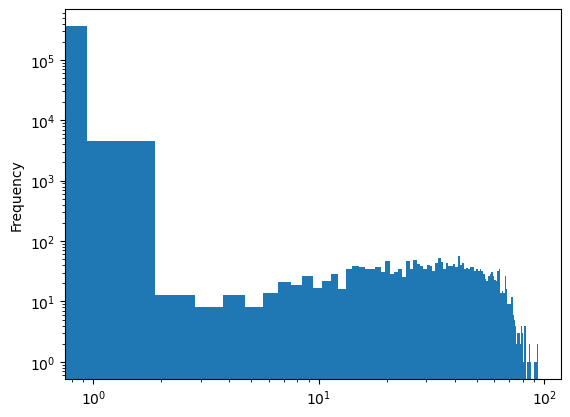

In [142]:
tracks.dist.plot(kind='hist',bins=100)
plt.yscale('log')
plt.xscale('log')

In [122]:
max_dist = 0.2 # maximum distance in µm frame to frame (confinement region)
min_len = 5 # minimum length of the track in frames

In [116]:
tracks_f = tracks.copy()

In [123]:
list_track = []

for i in tracks_f.track_id.unique():
    tr = tracks_f[tracks_f.track_id == i]
    if tr.dist.max() > max_dist:
        continue
    else:
        if len(tr) > min_len:
            list_track.append(i)

In [125]:
index_d = [i for i in tracks_f.track_id.unique() if tracks_f[tracks_f.track_id == i].dist.max() < max_dist]
index_l = [i for i in tracks_f.track_id.unique() if len(tracks_f[tracks_f.track_id == i]) > min_len]

In [127]:
inter = set(index_d).intersection(set(index_l))
len(inter)

53

In [130]:
print(len(index_d)/len(tracks_f.track_id.unique()))

0.026000296018550497


In [153]:
tracks_f_2 = tracks_f[tracks_f.track_id.isin(list_track)].copy()

In [154]:
print(len(tracks.track_id.unique()))
print(len(tracks_f_2.track_id.unique()))

frac = len(tracks_f_2.track_id.unique())/len(tracks.track_id.unique())

print(frac)

20269
11934
0.588780896936208


In [156]:
def fraction_bound(track_df,max_dist,min_len):
    tracks_f = track_df[track_df.dist < max_dist]
    list_track = []

    for i in tracks_f.track_id.unique():
        tr = tracks_f[tracks_f.track_id == i]
        if len(tr) > min_len:
            list_track.append(i)
    
    tot = len(track_df.track_id.unique())
    bound = len(list_track)
    print(bound/tot)
    return bound/tot


In [168]:
frac = np.zeros((5,10))
for row,i in enumerate(tqdm([0.1,0.2,0.3,0.4,0.5])):
    for index,j in enumerate(tqdm(range(1,11))):
        frac[row][index] = fraction_bound(tracks,i,j)

  0%|          | 0/5 [00:00<?, ?it/s]

0.5270610291578273


0.3920272337066456


0.3217721643889684


0.27115299225418127


0.23375598204154127


0.19976318515960334


0.1713947407370862


0.14647984607035375


0.12674527603729835


 20%|██        | 1/5 [00:53<03:34, 53.65s/it]

0.11120430213626721


0.6934234545364842


0.5514825595737333


0.48004341605407275


0.4326311115496571


0.3934086536089595


0.36272139720755836


0.336425082638512


0.31210222507277124


0.2883714046080221


 40%|████      | 2/5 [01:58<03:01, 60.49s/it]

0.2674527603729834


0.789678819872712


0.6397947604716562


0.5607084710641866


0.5073264591247718


0.4672159455325867


0.4362326705806897


0.40692683408160246


0.3829493314914401


0.3622773693818146


 60%|██████    | 3/5 [03:12<02:12, 66.44s/it]

0.3397799595441314


0.8559376387586956


0.7089150920124327


0.6241057772953772


0.5636193201440624


0.5202526024964231


0.48438502146134493


0.4542404657358528


0.42912822536878975


0.4064828062558587


 80%|████████  | 4/5 [04:29<01:10, 70.80s/it]

0.38398539641817553


0.9005871034584834


0.757610143568997


0.6710247175489664


0.608564803394346


0.5608071439143519


0.5231141151512162


0.4902560560461789


0.4613449109477527


0.4375154176328383


100%|██████████| 5/5 [05:50<00:00, 70.13s/it]

0.41422862499383295


In [175]:
f = frac[frac>0]
f = np.reshape(f,(5,10))

In [176]:
f.shape

(5, 10)

In [182]:
mask = np.zeros_like(f)
mask[np.triu_indices_from(mask)] = True

In [184]:
mask.shape

(5, 10)

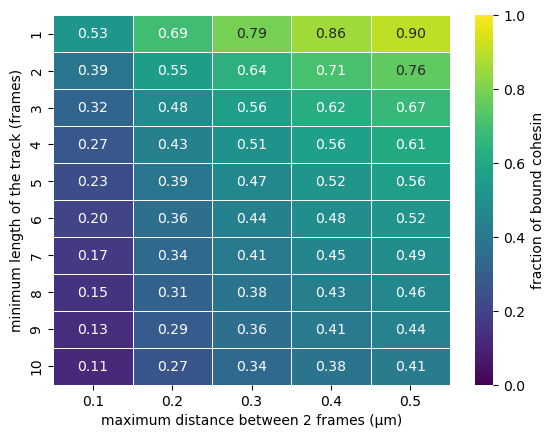

In [186]:
sns.heatmap(f.T,yticklabels=range(1,11),xticklabels=[0.1,0.2,0.3,0.4,0.5],cmap='viridis',vmin=0,vmax=1,cbar_kws={'label': 'fraction of bound cohesin'},annot=True,fmt='.2f',linewidth=0.7,square=False,cbar=True)
plt.xlabel('maximum distance between 2 frames (µm)')
plt.ylabel('minimum length of the track (frames)')
plt.show()

# Try to see if the image shows wierd frequency 

In [3]:
from tifffile import imread

In [4]:
im = imread('/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/denoised/C1/20231011/C1-20231004_Rad21-Halo_SPT_1G6_WT_noaux_nodtag_1.nd_denoised-0f9e0dc9f6d4e02c.tif')

In [33]:
im_2 = imread('/tungstenfs/scratch/ggiorget/nessim/microscopy_data/20230605/tiff_images/denoised/20230605_Rad21-Halo_G6_1_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif')

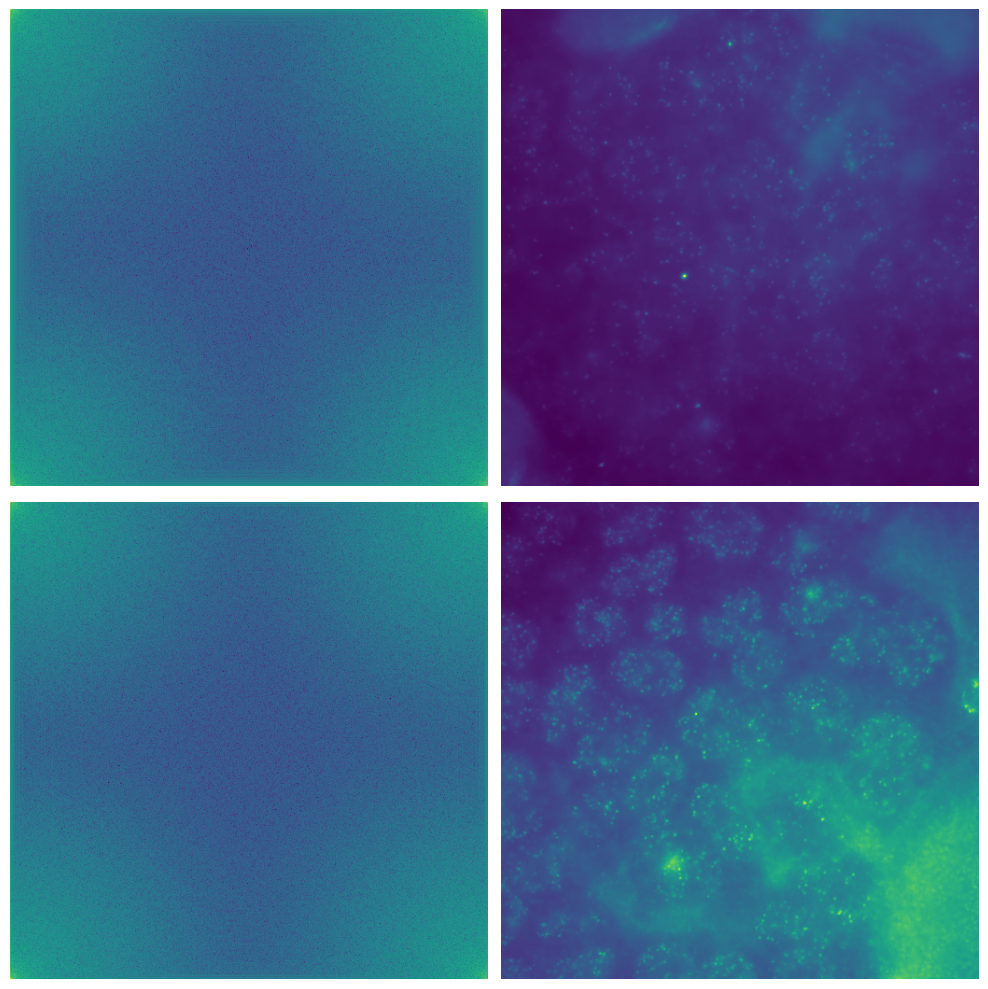

In [46]:
frame = 50

test = im[frame,:]
test = np.max(test,axis=0)
f = np.fft.fft2(test)

test_2 = im_2[frame,:]
test_2 = np.max(test_2,axis=0)
f_2 = np.fft.fft2(test_2)

fig,ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.flatten()

ax[0].imshow(np.log(np.abs(f)))
ax[1].imshow(test)
ax[2].imshow(np.log(np.abs(f_2)))
ax[3].imshow(test_2)

for a in ax:
    a.axis('off')

plt.tight_layout()

# Try to play around with the tracks

In [3]:
tracks = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/tracks_merged__20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')

In [26]:
tracks.x = tracks.x*0.16
tracks.y = tracks.y*0.16

In [4]:
for i in tracks.track_id.unique():
    tr = tracks[tracks.track_id == i]
    tr['dist'] = np.sqrt((tr.x - tr.x.shift(1))**2 + (tr.y - tr.y.shift(1))**2)
    tracks.loc[tr.index,'dist'] = tr.dist

/scratch/louaness/ipykernel_185045/1553102843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['dist'] = np.sqrt((tr.x - tr.x.shift(1))**2 + (tr.y - tr.y.shift(1))**2)
/scratch/louaness/ipykernel_185045/1553102843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['dist'] = np.sqrt((tr.x - tr.x.shift(1))**2 + (tr.y - tr.y.shift(1))**2)


In [5]:
from sklearn.cluster import KMeans

In [23]:
dists = np.array(tracks.dist.values)

In [24]:
len(dists)

372376

In [27]:
np.nan_to_num(dists,copy=False)

array([0.        , 0.        , 0.        , ..., 0.29176971, 0.14924745,
       0.32817029])

In [28]:
dists

array([0.        , 0.        , 0.        , ..., 0.29176971, 0.14924745,
       0.32817029])

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = dists.reshape(-1, 1)

sil_score_max = -1 #this is the minimum possible score
sse = []
rang = range(2,22)
for n_clusters in tqdm(rang):
    model = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=1, n_init=1)
    labels = model.fit_predict(X)
    sse.append(model.inertia_)


100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


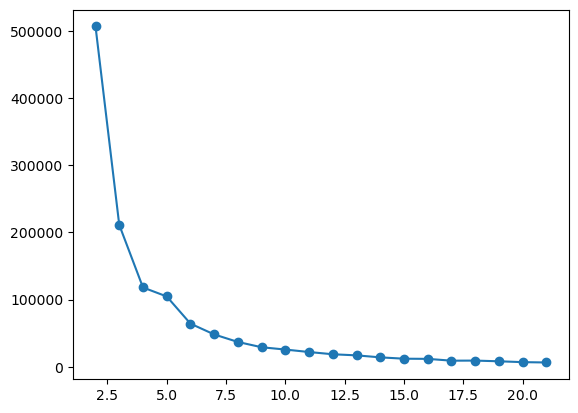

In [30]:
plt.plot(rang,sse)
plt.scatter(rang,sse)

In [31]:
from kneed import KneeLocator

In [32]:
kl = KneeLocator(rang, sse, curve="convex", direction="decreasing")

print(kl.elbow)

6


In [33]:
cluster_id = KMeans(kl.elbow).fit_predict(dists.reshape(-1, 1))

/tungstenfs/scratch/ggiorget/nessim/miniconda3/envs/spt/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


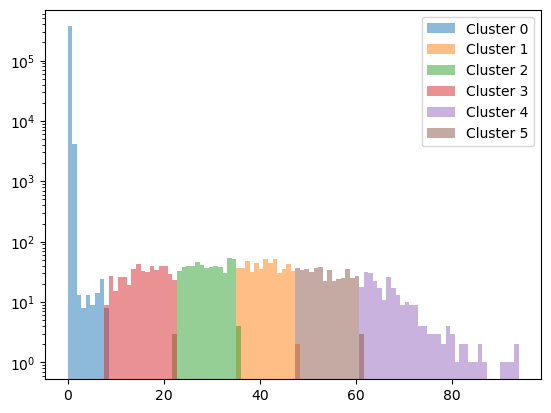

In [34]:
fig, ax = plt.subplots()
bins = np.linspace(dists.min(), dists.max(), 100)
for ii in np.unique(cluster_id):
    subset = dists[cluster_id==ii]
    ax.hist(subset, bins=bins, alpha=0.5, label=f"Cluster {ii}")
ax.set_yscale('log')
ax.legend()
plt.show()

In [35]:
tracks['cluster_id'] = cluster_id

In [45]:
tracks_g = tracks.groupby('track_id').mean()

/scratch/louaness/ipykernel_267938/453384438.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tracks_g = tracks.groupby('track_id').mean()


In [46]:
tracks_g[tracks_g.cluster_id > 0]

,Unnamed: 0,x,y,frame,label,z,dist,cluster_id
track_id,,,,,,,,
9,1597.833333,52.954024,15.489699,3.000000,20.333333,0.0,5.597557,0.333333
13,38584.476190,55.077700,3.455960,11.000000,25.666667,0.0,3.145352,0.238095
16,1507.500000,72.026231,22.766483,1.000000,16.500000,0.0,14.795639,0.250000
22,58051.543860,49.252853,28.109860,35.105263,25.473684,0.0,0.700704,0.043860
23,140158.797872,56.038604,8.387169,46.542553,23.808511,0.0,1.027940,0.042553
...,...,...,...,...,...,...,...,...
8126,95578.550000,59.657567,47.045644,45.200000,29.300000,0.0,2.043754,0.050000
8144,61524.571429,47.485966,57.518117,66.285714,50.000000,0.0,12.157403,0.571429
8181,92816.142857,67.479044,37.830622,52.071429,47.000000,0.0,3.287805,0.071429


## Test if for all tracks spots actually bleach

In [27]:
tracks

,Unnamed: 0,x,y,frame,track_id,label,channel,z
0,1,59.968492,0.136508,0,1,27,w1,0
1,9,62.527312,0.912616,0,9,27,w1,0
2,13,58.804252,0.898535,0,13,27,w1,0
3,16,67.936375,1.100985,0,16,27,w1,0
4,17,69.444175,1.083564,0,17,27,w1,0
...,...,...,...,...,...,...,...,...
372371,27386,64.243593,70.494296,180,8181,245,w2,0
372372,27387,66.012543,71.932771,180,8040,245,w2,0
372373,27388,49.246719,72.193990,180,7408,195,w2,0
372374,27391,32.194147,73.226720,180,5166,109,w2,0


In [5]:
from tifffile import imread

In [6]:
im = imread('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/images/20230531_Rad21-Halo_sororin_2D5_0h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif')

In [7]:
im.shape

(181, 5, 512, 512)

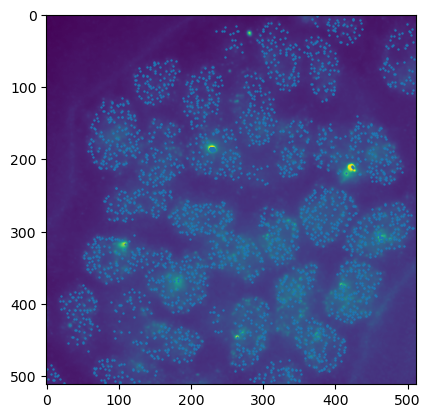

In [8]:
plt.imshow(im[0,0,:,:])
plt.scatter(tracks[tracks.frame == 0].x,tracks[tracks.frame == 0].y,s=0.5)

In [9]:
for index,i in enumerate(tracks.iloc):
    tracks.loc[index,'intensity'] = im[i.frame,i.z,int(i.y),int(i.x)]
    #print(im[i.frame,i.z,int(i.y),int(i.x)])

In [10]:
def filter_tracks(df, min_length = 150):
    n = df.groupby('track_id').size() > min_length
    n = n[n == True]
    df_filtered = df[df.track_id.isin(n.index.values)]
    return df_filtered

In [11]:
t = filter_tracks(tracks)

In [35]:
len(t.track_id.unique())

4

In [77]:
t

,Unnamed: 0,x,y,frame,track_id,label,channel,z,intensity
87,134,381.892875,70.842163,0,134,7,w1,0,22018.0
1491,1984,252.955923,169.669815,0,1984,8,w1,0,23366.0
2051,2681,98.282756,368.731809,0,2681,2,w1,0,19635.0
2877,3733,381.173824,73.215916,1,134,7,w1,0,21034.0
3258,4247,355.872709,260.740543,1,3817,3,w1,0,21969.0
...,...,...,...,...,...,...,...,...,...
361167,13237,218.843637,131.755103,85,134,59,w2,0,8688.0
361440,13575,217.800896,133.488629,87,134,59,w2,0,9003.0
361653,13840,220.621263,130.581402,89,134,59,w2,0,9044.0
361873,14125,219.187447,130.703602,91,134,59,w2,0,8751.0


In [12]:
def autocorr5(x,lags):
    '''numpy.correlate, non partial'''
    mean=x.mean()
    var=np.var(x)
    xp=x-mean
    corr=np.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)

    return corr[:len(lags)]


0
0
0
1


(0.0, 181.0)

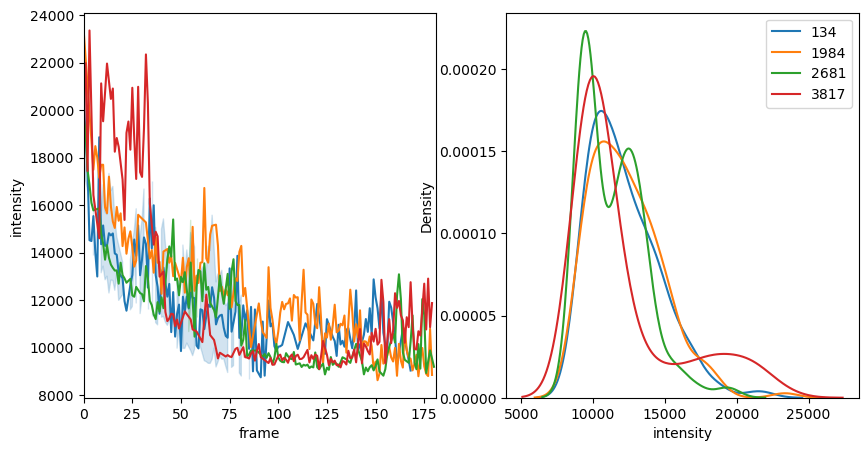

In [33]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
smoothness = []
autocorr = []
ints = []
for tra in t.track_id.unique():
    tr = tracks[tracks.track_id == tra]
    #sns.scatterplot(x=tr.frame,y=tr.intensity,hue=tr.frame,ax=ax[0],legend=False)
    sns.lineplot(x=tr.frame,y=tr.intensity,ax=ax[0])
    print(tr.frame.values[0])
    sns.kdeplot(tr.intensity,ax=ax[1],label=tra)
    ax[1].legend()
    smoothness.append(tr.intensity.diff().std()/np.abs(tr.intensity.diff().mean()))
    autocorr.append(autocorr5(tr.intensity.values,np.arange(1,150)))
    ints.append(tr.intensity.values)
    #break
ax[0].set_xlim(0,181)

In [35]:
ints[3] = ints[3][:-10]

In [34]:
for i in range(4):
    for j in range(i,4):
        a = ints[i][:len(ints[j])]

        # Compute the Spearman correlation coefficient between x and y
        corr, p_value = spearmanr(a, ints[j])

        print(f'Spearman correlation coefficient between {i} and {j}: {corr:.3f}')
        print(f'p-value: {p_value}')

Spearman correlation coefficient between 0 and 0: 1.000
p-value: 0.0
Spearman correlation coefficient between 0 and 1: 0.472
p-value: 2.0481701346317828e-10
Spearman correlation coefficient between 0 and 2: 0.548
p-value: 6.587649631057122e-14
Spearman correlation coefficient between 0 and 3: 0.731
p-value: 1.5831406630043497e-27
Spearman correlation coefficient between 1 and 1: 1.000
p-value: 0.0
Spearman correlation coefficient between 1 and 2: 0.727
p-value: 1.5430185312732525e-27
Spearman correlation coefficient between 1 and 3: 0.375
p-value: 1.2776671228027486e-06
Spearman correlation coefficient between 2 and 2: 1.000
p-value: 0.0
Spearman correlation coefficient between 2 and 3: 0.479
p-value: 2.2902708875974596e-10
Spearman correlation coefficient between 3 and 3: 1.000
p-value: 0.0


In [36]:
for i in range(4):
    for j in range(i,4):
        a = ints[i][:len(ints[j])]

        # Compute the Spearman correlation coefficient between x and y
        corr, p_value = spearmanr(a, ints[j])

        print(f'Spearman correlation coefficient between {i} and {j}: {corr:.3f}')
        print(f'p-value: {p_value}')

Spearman correlation coefficient between 0 and 0: 1.000
p-value: 0.0
Spearman correlation coefficient between 0 and 1: 0.472
p-value: 2.0481701346317828e-10
Spearman correlation coefficient between 0 and 2: 0.548
p-value: 6.587649631057122e-14
Spearman correlation coefficient between 0 and 3: 0.755
p-value: 2.617609474881464e-28
Spearman correlation coefficient between 1 and 1: 1.000
p-value: 0.0
Spearman correlation coefficient between 1 and 2: 0.727
p-value: 1.5430185312732525e-27
Spearman correlation coefficient between 1 and 3: 0.458
p-value: 5.3877630418859725e-09
Spearman correlation coefficient between 2 and 2: 1.000
p-value: 0.0
Spearman correlation coefficient between 2 and 3: 0.519
p-value: 1.722674463206184e-11
Spearman correlation coefficient between 3 and 3: 1.000
p-value: 0.0


In [19]:
cor = np.correlate(ints[0],ints[1])
cor

array([2.62662088e+10, 2.61072318e+10, 2.59254322e+10, 2.58125355e+10,
       2.57209604e+10, 2.55882370e+10, 2.55379225e+10, 2.54444742e+10,
       2.53511413e+10, 2.52775463e+10, 2.51737693e+10, 2.50740011e+10,
       2.50025318e+10, 2.48985910e+10, 2.48421293e+10, 2.47910815e+10,
       2.47714282e+10, 2.47182815e+10, 2.46514295e+10, 2.45872092e+10,
       2.44908102e+10, 2.43964441e+10, 2.43461183e+10, 2.42827417e+10,
       2.41884716e+10, 2.41237655e+10, 2.40855740e+10, 2.39560636e+10,
       2.38796824e+10, 2.37913486e+10, 2.37615066e+10, 2.36685124e+10,
       2.35729417e+10, 2.35043670e+10, 2.34689740e+10, 2.34072117e+10,
       2.33559448e+10, 2.33053539e+10, 2.32900280e+10, 2.32107119e+10,
       2.31619986e+10])

In [39]:
ar = tr.intensity.values

In [42]:
a = (ar[:-1]+ar[1:])/2

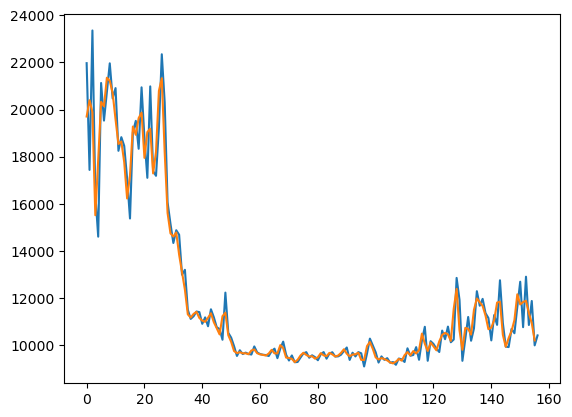

In [44]:
plt.plot(ar)
plt.plot(a)

In [45]:
aut_a = autocorr5(a,np.arange(1,150))


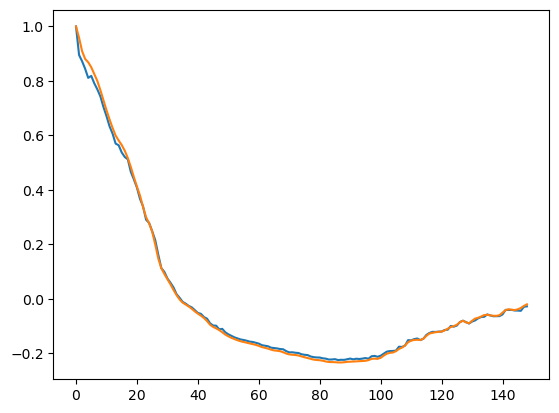

In [46]:
plt.plot(autocorr[-1])
plt.plot(aut_a)


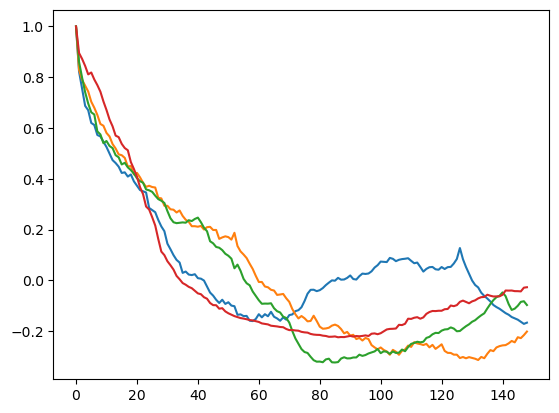

In [91]:
for i in autocorr:
    plt.plot(i)

In [83]:
print(smoothness)

[19.439730348752395, 12.628075577581333, 17.871228767324123, 20.000181432998897]


In [78]:
smooth = tr.intensity.diff().std()/np.abs(tr.intensity.diff().mean())
smooth_2 = t[t.track_id == 1984].intensity.diff().std()/np.abs(t[t.track_id == 1984].intensity.diff().mean())

print(smooth,smooth_2)

20.000181432998897 12.628075577581333


In [30]:
len(tracks.track_id.unique())

20269

# Plot MSD of fixed movies

In [14]:
df_cor_bleach

,Unnamed: 0,lags,tamsd,weight,uniqueid,track_id,trStart,channel
0,0,1.0,8.004654,18.0,25e4179ea65bad71,1,0,w1
1,1,2.0,12.345935,17.0,25e4179ea65bad71,1,0,w1
2,2,3.0,12.705680,23.0,25e4179ea65bad71,1,0,w1
3,3,4.0,14.847313,21.0,25e4179ea65bad71,1,0,w1
4,4,5.0,20.910762,16.0,25e4179ea65bad71,1,0,w1
...,...,...,...,...,...,...,...,...
27476,9,10.0,4.540266,11.0,6d362427ce5aef05,1842,142,w2
27477,10,11.0,5.503868,10.0,6d362427ce5aef05,1842,142,w2
27478,11,12.0,7.911745,11.0,6d362427ce5aef05,1842,142,w2
27479,12,13.0,9.196788,11.0,6d362427ce5aef05,1842,142,w2


In [15]:
df_cor_bleach.tamsd = df_cor_bleach.tamsd*(0.16) # from pixel to µm
df_cor_bleach.lags = df_cor_bleach.lags*10 # from frame to seconds
df_cor_bleach.tamsd = df_cor_bleach.tamsd - (2*(0.035**2)) # subtract the localization error
df_cor_bleach.rename(columns={'tamsd':'MSD(µm^2)','lags':'lags(s)'}, inplace=True)

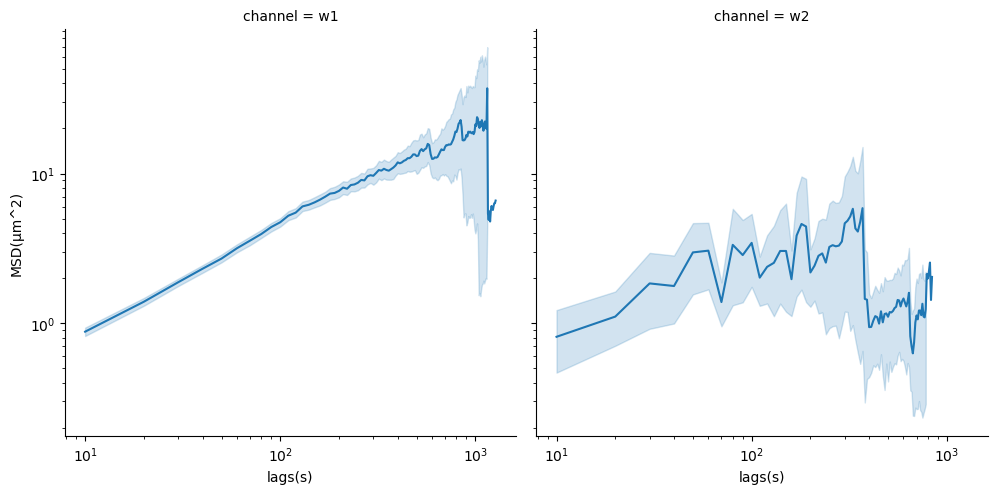

In [19]:
sns.relplot(data=df_cor_bleach,x='lags(s)',y='MSD(µm^2)',kind='line',legend=False,col='channel')
plt.xscale('log')
plt.yscale('log')